### Introduction

Ducks are gentle and peaceful creatures, and should have a neighborhood to stay in that is the same. The datasets used were arrest data from neighborhoods in Pittsburgh along with census population data in order to analyze the safest place for a duck to stay. 

#### Organize crimes in pittsburgh by neighborhood

In [1]:
import pandas as pd

crime = pd.read_csv("crime.csv") #get the data

neigh = crime.groupby('INCIDENTNEIGHBORHOOD').count() #count how many arrests for each neighborhood
neigh['Crime count'] = neigh['_id'] #rename column

crime_count = neigh[[ "Crime count"]] #all other columns are useless

crime_count.head(5)

,Crime count
INCIDENTNEIGHBORHOOD,
Allegheny Center,1227
Allegheny West,127
Allentown,930
Arlington,302
Arlington Heights,153


#### Put in ascending order and create bar graph

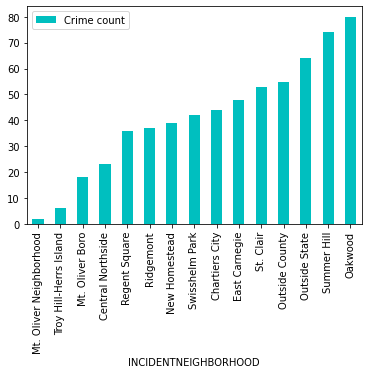

In [2]:
crime_count = crime_count.sort_values(by = "Crime count", ascending=True) #sortsldfj
crime_count.head(15).plot.bar(color='c')

#### Get seperate population data and plot it for reference. merge it with crime count. Create new metric 'Crime rate'

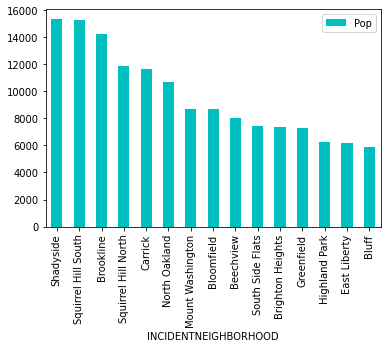

In [3]:
pop = pd.read_csv("populations.csv")
pop = pop.sort_values(by = "Pop", ascending=False) 
pop.head(15).plot.bar(x = "INCIDENTNEIGHBORHOOD", color='c')

### Merge population data with crime count. Create new metric 'Crime rate'

In [4]:
pop = pd.read_csv("populations.csv")
new_data = pd.merge(crime_count, pop, on="INCIDENTNEIGHBORHOOD")

new_data["Crime count"] = new_data["Crime count"].astype(int) #converting data cause i need to do math
new_data["Pop"] = new_data["Pop"].astype(int) 
new_data["Crime rate"] = new_data["Crime count"] / new_data["Pop"] #math

filtered_data = new_data[new_data["Pop"] > 1000] #exclude neighborhoods with population < 1000 because 
percentage_data = filtered_data[["INCIDENTNEIGHBORHOOD", "Crime rate"]] #the columns i want
percentage_data.head()

,INCIDENTNEIGHBORHOOD,Crime rate
0,Central Northside,0.007708
1,Regent Square,0.020560
3,Swisshelm Park,0.024706
7,Summer Hill,0.052594
8,Oakwood,0.052666


### Show top 15 Neighborhoods with lowest crime rate

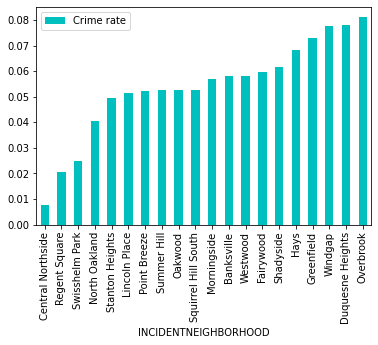

In [5]:
#new_data = new_data.groupby('INCIDENTNEIGHBORHOOD')
percentage_data = percentage_data.sort_values(by=["Crime rate"], ascending=True)
percentage_data.head(20).plot.bar(x="INCIDENTNEIGHBORHOOD", color='c')

### Conclusion 

According to this graph, Central northside is the clear safest area for a duck to live. Less dangerous people is better for duck and that is what Central Northside seems to provide. Other notable neighborhoods like North Oakland and Squirrel Hill South are among the bigger neighborhoods but still have low crime rates. My favorite neighborhood is Friendship because I live there, it's not in the graph but I feel very safe there (ranked 21 out of 60)